### ML ASSIGNMENT 1 SET 3 QUESTION 1
#### WORK NEED TO DO AS FOLLOWING:
##### 1. Import the dataset from https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/leukemia_remission/index.txt  (Links ##### to an external site.)(Hint: Convert txt to csv for ease of use.)
##### 2. Extract X as all columns except the first column and Y as first column. 
##### 3. Visualize the dataset. 
##### 4. Split the data into training set and testing set.  Perform 10-fold cross validation.
##### 5. Train a Logistic regression model for the dataset. 
##### 6. Display the coefficients and form the logistic regression equation. 
##### 7. Compute the accuracy and confusion matrix. 
##### 8. Display the correlation between all the attributes. 

##### Importing all required libraries

In [106]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os

##### 1. Import the dataset from https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/leukemia_remission/index.txt  (Links ##### to an external site.)(Hint: Convert txt to csv for ease of use.)

In [107]:
# Reading data set from current directory
THIS_FOLDER=os.getcwd() #getting current working directory
print(THIS_FOLDER)
input_file = os.path.join(THIS_FOLDER, 'Cancer_det.csv')
data=pd.read_csv(input_file)
data.head(20)

C:\Users\kdevanand\ML


,State,Lat,Mort,Ocean,Long
0,Alabama,33.0,219,1,87.0
1,Arizona,34.5,160,0,112.0
2,Arkansas,35.0,170,0,92.5
3,California,37.5,182,1,119.5
4,Colorado,39.0,149,0,105.5
5,Connecticut,41.8,159,1,72.8
6,Delaware,39.0,200,1,75.5
7,Wash D.C.,39.0,177,0,77.0
8,Florida,28.0,197,1,82.0
9,Georgia,33.0,214,1,83.5


##### 2. Extract X as all columns except the first column and Y as first column. 

In [108]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   49 non-null     object 
 1   Lat     49 non-null     float64
 2   Mort    49 non-null     int64  
 3   Ocean   49 non-null     int64  
 4   Long    49 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.0+ KB


(49, 5)

In [109]:
x = np.array(data['Lat']).reshape((-1,1))
print("LATITUTE ARRAY : ",x)
y = np.array(data['Mort'])
print("\nMORTAL ARRAY : ",y)

LATITUTE ARRAY :  [[33. ]
 [34.5]
 [35. ]
 [37.5]
 [39. ]
 [41.8]
 [39. ]
 [39. ]
 [28. ]
 [33. ]
 [44.5]
 [40. ]
 [40.2]
 [42.2]
 [38.5]
 [37.8]
 [31.2]
 [45.2]
 [39. ]
 [42.2]
 [43.5]
 [46. ]
 [32.8]
 [38.5]
 [47. ]
 [41.5]
 [39. ]
 [43.8]
 [40.2]
 [35. ]
 [43. ]
 [35.5]
 [47.5]
 [40.2]
 [35.5]
 [44. ]
 [40.8]
 [41.8]
 [33.8]
 [44.8]
 [36. ]
 [31.5]
 [39.5]
 [44. ]
 [37.5]
 [47.5]
 [38.8]
 [44.5]
 [43. ]]

MORTAL ARRAY :  [219 160 170 182 149 159 200 177 197 214 116 124 128 128 166 147 190 117
 162 143 117 116 207 131 109 122 191 129 159 141 152 199 115 131 182 136
 132 137 178  86 186 229 142 153 166 117 136 110 134]


##### 3. Visualize the dataset. 

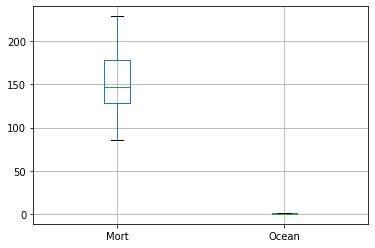

In [110]:
data.boxplot(column=["Mort", "Ocean"])

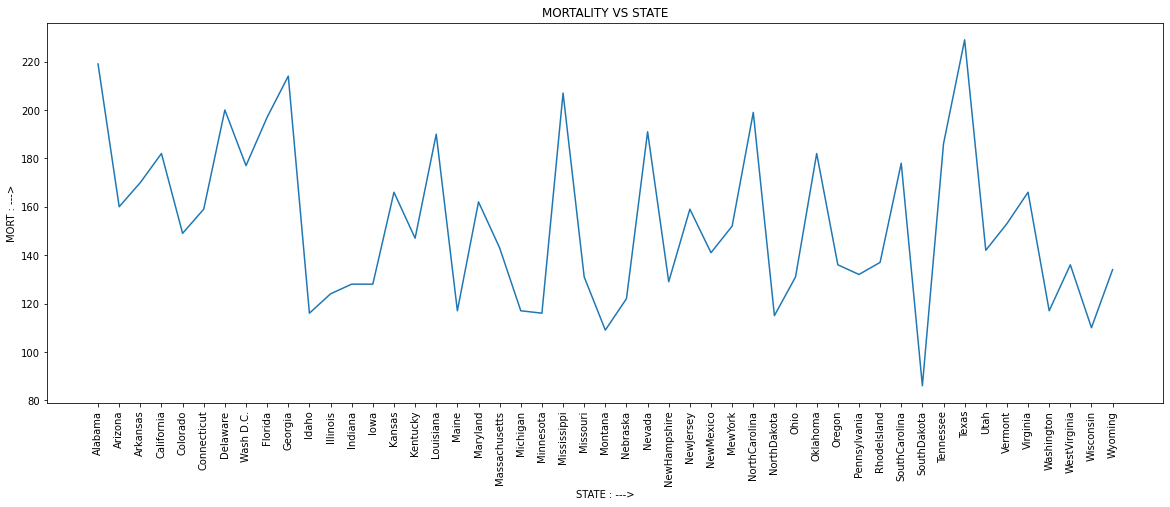

In [111]:
plt.figure(figsize = (20,7))
plt.plot(data["State"], data["Mort"])
plt.xticks(rotation = 90)
plt.xlabel("STATE : --->")
plt.ylabel("MORT : --->")
plt.title("MORTALITY VS STATE")
plt.show()

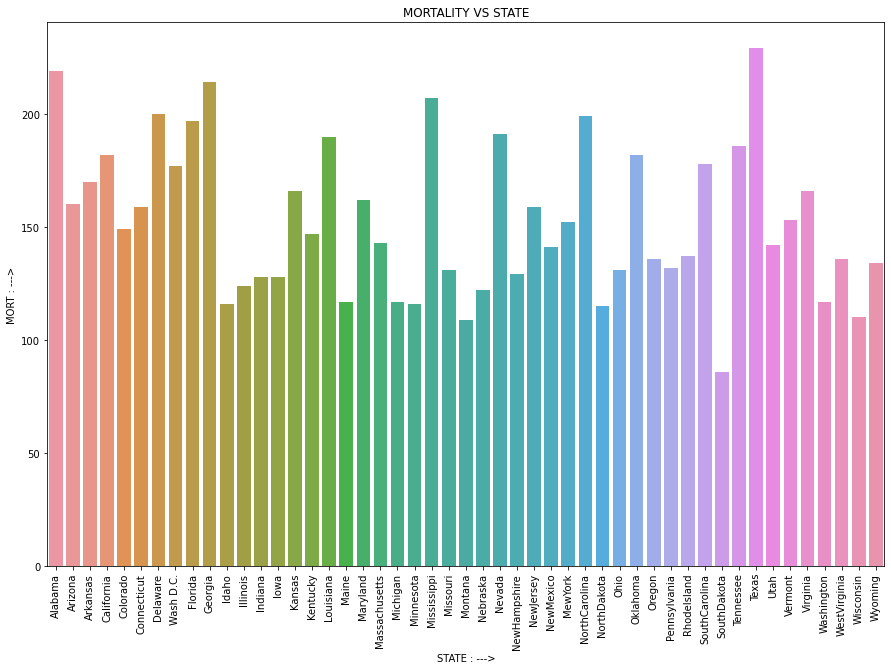

In [112]:
plt.figure(figsize = (15,10))
ax = sns.barplot(x=data["State"],y=data["Mort"])
plt.xticks(rotation = 90)
plt.xlabel("STATE : --->")
plt.ylabel("MORT : --->")
plt.title("MORTALITY VS STATE")
plt.show()

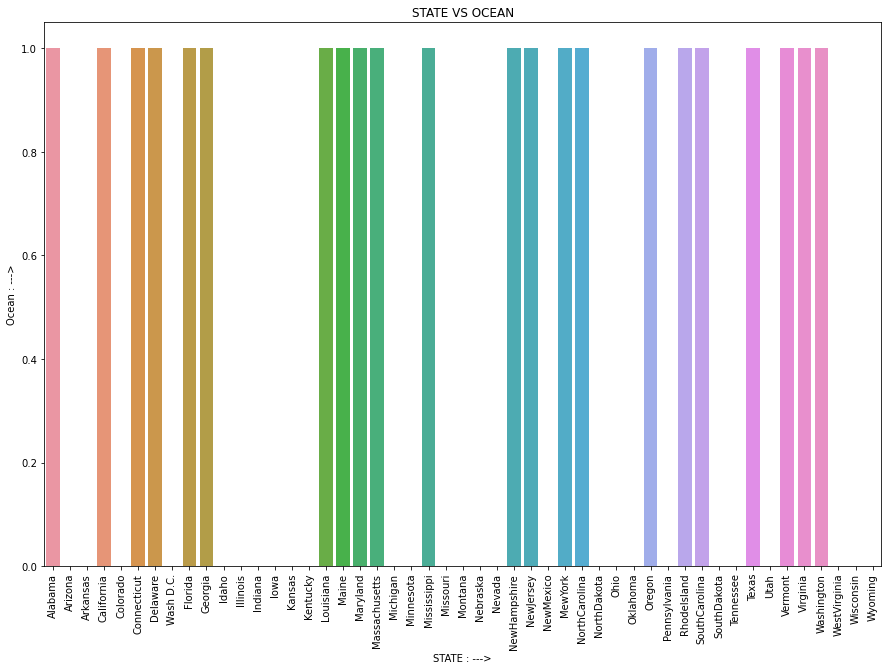

In [113]:
plt.figure(figsize = (15,10))
ax = sns.barplot(x=data["State"],y=data["Ocean"])
plt.xticks(rotation = 90)
plt.xlabel("STATE : --->")
plt.ylabel("Ocean : --->")
plt.title("STATE VS OCEAN")
plt.show()

##### 4. Split the data into training set and testing set.  Perform 10-fold cross validation.
##### Training Data:
###### 5. Train a Logistic regression model for the dataset. 
###### 6. Display the coefficients and form the logistic regression equation. 

###### Performed 10-fold cross validation and found each fold accuracy and average accuracy

In [114]:
X = np.array(data['Lat']).reshape((-1,1))
Y = np.array(data['Mort'])
print("\nMORTAL ARRAY : ",y)
k = 10
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X[train_index],X[test_index]
    y_train , y_test = Y[train_index] , Y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('\nACCURACY OF EACH FOLD - {}\n'.format(acc_score))
print('AVERAGE ACCURACY : {}'.format(avg_acc_score))


MORTAL ARRAY :  [219 160 170 182 149 159 200 177 197 214 116 124 128 128 166 147 190 117
 162 143 117 116 207 131 109 122 191 129 159 141 152 199 115 131 182 136
 132 137 178  86 186 229 142 153 166 117 136 110 134]

ACCURACY OF EACH FOLD - [0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0]

AVERAGE ACCURACY : 0.04


X_TEST :
 [[33. ]
 [34.5]
 [35. ]
 [37.5]
 [39. ]
 [41.8]
 [39. ]
 [39. ]
 [28. ]
 [33. ]]

Y_TEST :  [219 160 170 182 149 159 200 177 197 214]

COEFFICIENT/SLOPE :  [-3.20826808]

INTERCEPT :  298.1334854458065


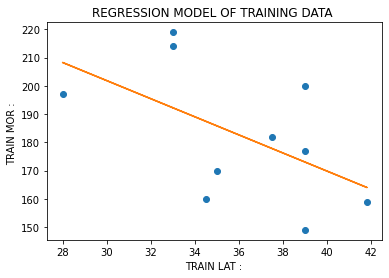

In [115]:
x_train = np.array(data['Lat'].head(10)).reshape((-1,1))
y_train = np.array(data['Mort'].head(10))
model=LinearRegression().fit(x_train,y_train)
print("X_TEST :\n",x_train)
print("\nY_TEST : ",y_train)
print("\nCOEFFICIENT/SLOPE : ",model.coef_)
print("\nINTERCEPT : ",model.intercept_)
#plt.scatter(x_test,y_test)
plt.title('REGRESSION MODEL OF TRAINING DATA ')
plt.xlabel('TRAIN LAT : ')
plt.ylabel('TRAIN MOR : ')
plt.plot(x_train, y_train,'o')
plt.plot(x_train, model.coef_*x_train + model.intercept_)
plt.show()

X_TEST :
 [[33. ]
 [34.5]
 [35. ]
 [37.5]
 [39. ]
 [41.8]
 [39. ]
 [39. ]
 [28. ]
 [33. ]]

Y_TEST :  [1 0 0 1 0 1 1 0 1 1]

COEFFICIENT/SLOPE :  [-0.02416698]

INTERCEPT :  1.4695280012961067


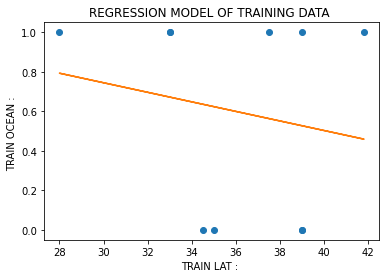

In [116]:
x_train = np.array(data['Lat'].head(10)).reshape((-1,1))
y_train = np.array(data['Ocean'].head(10))
model=LinearRegression().fit(x_train,y_train)
print("X_TEST :\n",x_train)
print("\nY_TEST : ",y_train)
print("\nCOEFFICIENT/SLOPE : ",model.coef_)
print("\nINTERCEPT : ",model.intercept_)
#plt.scatter(x_test,y_test)
plt.title('REGRESSION MODEL OF TRAINING DATA ')
plt.xlabel('TRAIN LAT : ')
plt.ylabel('TRAIN OCEAN : ')
plt.plot(x_train, y_train,'o')
plt.plot(x_train, model.coef_*x_train + model.intercept_)
plt.show()

##### Test Data:
###### 5. Train a Logistic regression model for the dataset. 
###### 6. Display the coefficients and form the logistic regression equation. 

X_TEST :
 [[33. ]
 [34.5]
 [35. ]
 [37.5]
 [39. ]
 [41.8]
 [39. ]
 [39. ]
 [28. ]
 [33. ]
 [44.5]
 [40. ]
 [40.2]
 [42.2]
 [38.5]
 [37.8]
 [31.2]
 [45.2]
 [39. ]
 [42.2]
 [43.5]
 [46. ]
 [32.8]
 [38.5]
 [47. ]]

Y_TEST :  [219 160 170 182 149 159 200 177 197 214 116 124 128 128 166 147 190 117
 162 143 117 116 207 131 109]

COEFFICIENT/SLOPE :  [-5.90303393]

INTERCEPT :  385.7799224237401


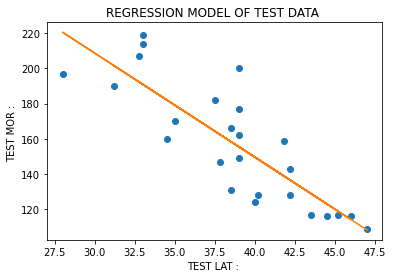

In [117]:
Splitx = np.array_split(data['Lat'],2)
Splity = np.array_split(data['Mort'],2)
x_test1 = np.array(Splitx[0]).reshape((-1,1))
y_test1 = np.array(Splity[0])
x_test1.reshape(-1,1)
model=LinearRegression().fit(x_test1,y_test1)
print("X_TEST :\n",x_test1)
print("\nY_TEST : ",y_test1)
print("\nCOEFFICIENT/SLOPE : ",model.coef_)
print("\nINTERCEPT : ",model.intercept_)
#plt.scatter(x_test,y_test)
plt.title('REGRESSION MODEL OF TEST DATA ')
plt.xlabel('TEST LAT : ')
plt.ylabel('TEST MOR : ')
plt.plot(x_test1, y_test1,'o')
plt.plot(x_test1, model.coef_*x_test1 + model.intercept_)
plt.show()

##### 7 Compute the accuracy and confusion matrix. 

###### ACCURACY : 

[[33. ]
 [34.5]
 [35. ]
 [37.5]
 [39. ]
 [41.8]
 [39. ]
 [39. ]
 [28. ]
 [33. ]
 [44.5]
 [40. ]
 [40.2]
 [42.2]
 [38.5]
 [37.8]
 [31.2]
 [45.2]
 [39. ]
 [42.2]
 [43.5]
 [46. ]
 [32.8]
 [38.5]
 [47. ]
 [41.5]
 [39. ]
 [43.8]
 [40.2]
 [35. ]
 [43. ]
 [35.5]
 [47.5]
 [40.2]
 [35.5]
 [44. ]
 [40.8]
 [41.8]
 [33.8]
 [44.8]
 [36. ]
 [31.5]
 [39.5]
 [44. ]
 [37.5]
 [47.5]
 [38.8]
 [44.5]
 [43. ]]
[219 160 170 182 149 159 200 177 197 214 116 124 128 128 166 147 190 117
 162 143 117 116 207 131 109 122 191 129 159 141 152 199 115 131 182 136
 132 137 178  86 186 229 142 153 166 117 136 110 134]
[191. 182. 179. 164. 156. 139. 156. 156. 220. 191. 123. 150. 148. 137.
 159. 163. 202. 119. 156. 137. 129. 114. 192. 159. 108. 141. 156. 127.
 148. 179. 132. 176. 105. 148. 176. 126. 145. 139. 186. 121. 173. 200.
 153. 126. 164. 105. 157. 123. 132.]

CONFUSION MATRIX (2D) : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

CONFUSION

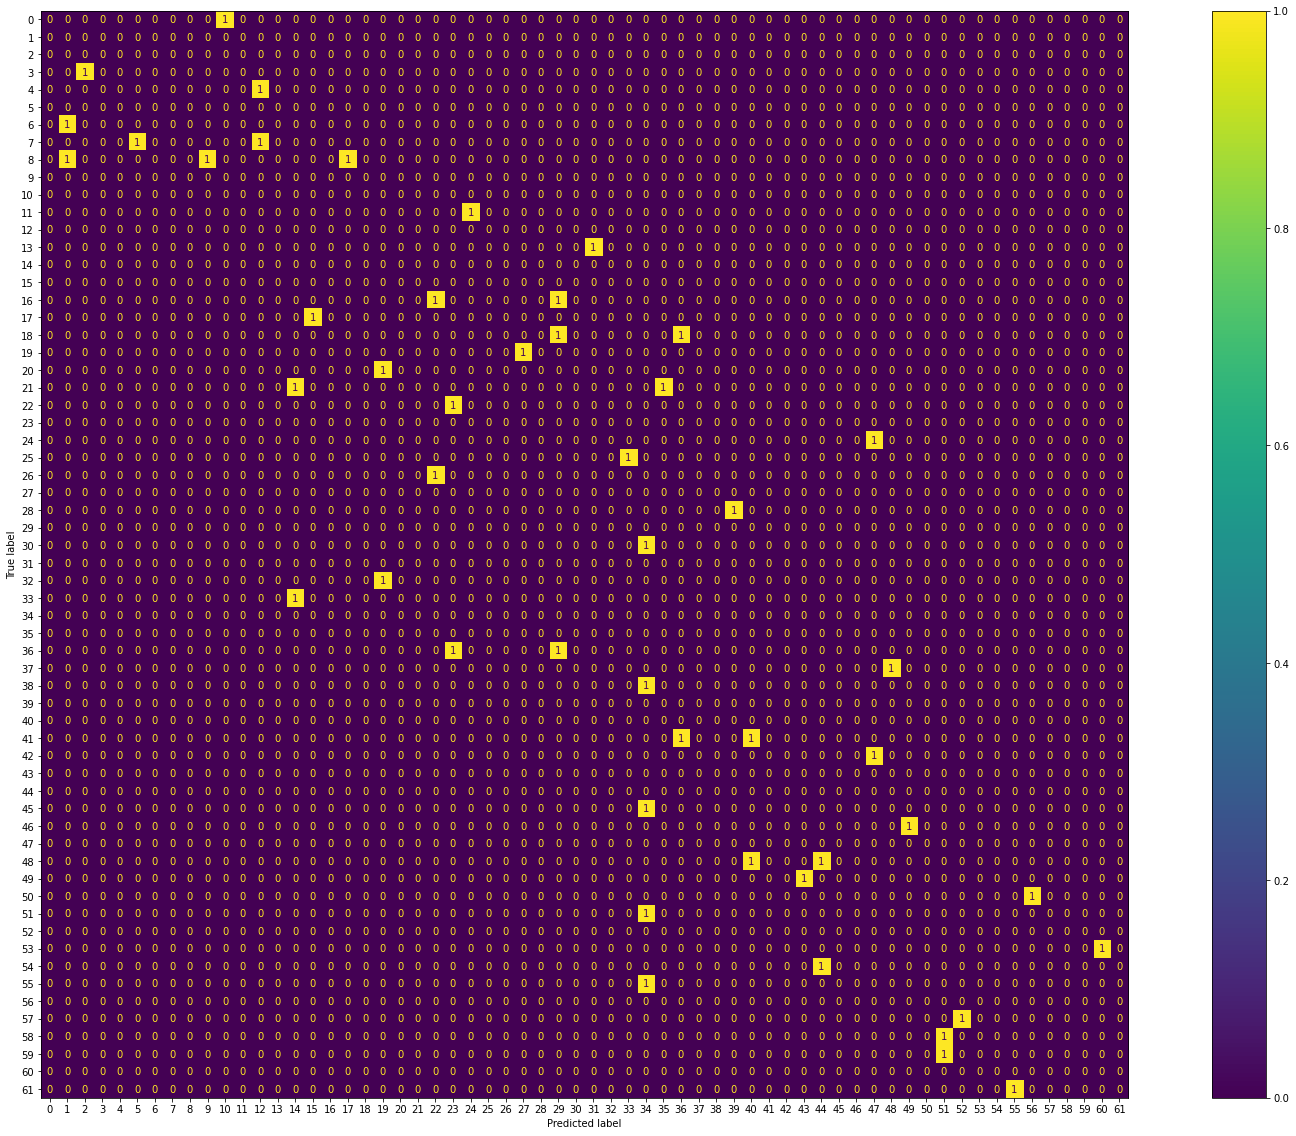

In [118]:
Splitx = np.array_split(data['Lat'],1)
Splity = np.array_split(data['Mort'],1)
x_rest = np.array(Splitx[0]).reshape((-1,1))
print(x_rest)
y_true = np.array(Splity[0])
print(y_true)
y_pred = np.array((model.predict(x_rest)))
y_pred = y_pred.round(decimals=0)
print(y_pred)
fig, ax = plt.subplots(figsize=(30, 20))
cm = confusion_matrix(y_true, y_pred)
print("\nCONFUSION MATRIX (2D) : \n",cm)
#tp, fn, fp, tn = confusion_matrix(y_true,y_pred,labels=[0,1]).reshape(-1)
#print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_true,y_pred)
print('\nCONFUSION MATRIX CLASSIFICATION REPORT INCLUDE ALL ATTRIBUTES OF CM : \n',matrix)
print("\nCONFUSION MATRIX GRAPH:\n")
cm_display = ConfusionMatrixDisplay(cm).plot(ax=ax)

##### 8 Display the correlation between all the attributes. 

In [119]:
x_test1 = np.array(data['Lat'])
y_test1 = np.array(data['Mort'])
corr_matrix= np.corrcoef(x_test1,y_test1)
print("CORRELATION COEFFICIENT FOR LAT AND MORT : \n\n", corr_matrix)

CORRELATION COEFFICIENT FOR LAT AND MORT : 

 [[ 1.         -0.82451779]
 [-0.82451779  1.        ]]


In [120]:
x_test1 = np.array(data['Lat'])
y_test1 = np.array(data['Ocean'])
corr_matrix= np.corrcoef(x_test1,y_test1)
print("CORRELATION COEFFICIENT FOR LAT AND OCEAN : \n\n", corr_matrix)

CORRELATION COEFFICIENT FOR LAT AND OCEAN : 

 [[ 1.         -0.21954196]
 [-0.21954196  1.        ]]


In [121]:
x_test1 = np.array(data['Mort'])
y_test1 = np.array(data['Ocean'])
corr_matrix= np.corrcoef(x_test1,y_test1)
print("CORRELATION COEFFICIENT FOR MORT AND OCEAN : \n\n", corr_matrix)

CORRELATION COEFFICIENT FOR MORT AND OCEAN : 

 [[1.        0.4733547]
 [0.4733547 1.       ]]


### THANK YOU